In [32]:
from rdkit import Chem

def MolFromGraphs(node_list, adjacency_matrix):
    # create empty editable mol object
    mol = Chem.RWMol()

    # add atoms to mol and keep track of index
    node_to_idx = {}
    for i in range(len(node_list)):
        a = Chem.Atom(node_list[i])
        molIdx = mol.AddAtom(a)
        node_to_idx[i] = molIdx

    # add bonds between adjacent atoms
    for ix, row in enumerate(adjacency_matrix):
        for iy, bond in enumerate(row):

            # only traverse half the matrix
            if iy <= ix:
                continue

            # add relevant bond type (there are many more of these)
            if bond == 0:
                continue
            elif bond == 1:
                bond_type = Chem.rdchem.BondType.SINGLE
                mol.AddBond(node_to_idx[ix], node_to_idx[iy], bond_type)
            elif bond == 2:
                bond_type = Chem.rdchem.BondType.DOUBLE
                mol.AddBond(node_to_idx[ix], node_to_idx[iy], bond_type)

    # Convert RWMol to Mol object
    mol = mol.GetMol()            

    return mol


In [ ]:
# Define nodes (atoms) and adjacency matrix (bonds)
node_list = ['C', 'C', 'O']
adjacency_matrix = [[0, 1, 0], [1, 0, 1], [0, 1, 0]]

# Convert the graph to a molecule
mol = MolFromGraphs(node_list, adjacency_matrix)

# Print the molecule's SMILES representation
print(Chem.MolToSmiles(mol))


In [ ]:
def to_canonical_smiles(smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"):
    # create a molecule object from the SMILES string
    mol = Chem.MolFromSmiles(smiles)

    # get the canonical SMILES
    canonical_smiles = Chem.MolToSmiles(mol, isomericSmiles=True)
    return canonical_smiles

# NX

In [ ]:
from rdkit import Chem
import networkx as nx

def MolFromGraphs(G):
    # create empty editable mol object
    mol = Chem.RWMol()

    # add atoms to mol and keep track of index
    node_to_idx = {}
    for i, data in G.nodes(data=True):
        a = Chem.Atom(data['atom_type'])
        molIdx = mol.AddAtom(a)
        node_to_idx[i] = molIdx

    # add bonds between adjacent atoms
    for i, j, data in G.edges(data=True):
        bond_type = None
        if data['bond_type'] == 1:
            bond_type = Chem.rdchem.BondType.SINGLE
        elif data['bond_type'] == 2:
            bond_type = Chem.rdchem.BondType.DOUBLE
        elif data['bond_type'] == 3:
            bond_type = Chem.rdchem.BondType.TRIPLE
        # add more bond types if needed

        if bond_type is not None:
            mol.AddBond(node_to_idx[i], node_to_idx[j], bond_type)

    # Convert RWMol to Mol object
    mol = mol.GetMol()            

    return mol


In [ ]:
# Define a graph
G = nx.Graph()

# Add nodes (atoms)
G.add_node(0, atom_type='C')
G.add_node(1, atom_type='C')
G.add_node(2, atom_type='O')

# Add edges (bonds)
G.add_edge(0, 1, bond_type=1)
G.add_edge(1, 2, bond_type=2)

# Convert the graph to a molecule
mol = MolFromGraphs(G)

# Print the molecule's SMILES representation
print(Chem.MolToSmiles(mol))


In [ ]:
mol

# PyG

In [ ]:
import torch_geometric as pyg
from rdkit import Chem
import networkx as nx
import torch

from rdkit import Chem
import networkx as nx

atomic_number_to_symbol = {
    0: 'C',
    1: 'H',
    2: 'O',
    3: 'N',
    4: 'F'
}

def creat_one_hot(symbol):
    vec = [0]*5
    for num, symbol_i in atomic_number_to_symbol.items():
        if symbol_i == symbol:
            vec[num] = 1
    return vec

print(creat_one_hot('F'))


def PyG_to_NX(pyg_graph):
    # Create a new NetworkX graph
    G = nx.Graph()
    
    atom_types = torch.argmax(pyg_graph.x, dim = 1).flatten()
    for i, atom_type in enumerate(atom_types): 
        atom_type_str = atomic_number_to_symbol[int(atom_type)]
        G.add_node(i, atom_type=atom_type_str)

    # Add edges to the NetworkX graph
    edge_index = pyg_graph.edge_index.t().tolist()
    bond_types = torch.argmax(pyg_graph.edge_attr, dim=1).flatten()
    for i, edge in enumerate(edge_index):
        bond_type = bond_types[i].item()
        print("bond_type", bond_type)
        G.add_edge(*edge, bond_type=bond_type)

    return G




In [ ]:
from torch_geometric.data import Data

# Define node features (atoms: C, C, O)
node_features = torch.tensor([[1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0]], dtype=torch.float)

# Define edge_index (connectivity: C-C, C-O)
edge_index = torch.tensor([[0, 1], [1, 2]], dtype=torch.long)

# Define edge attributes (bonds: single, single)
edge_attr = torch.tensor([[0, 1, 0, 0], [0, 0, 0, 1]], dtype=torch.float)

# Create a PyG graph
pyg_graph = Data(x=node_features, edge_index=edge_index, edge_attr=edge_attr)

# Convert the PyG graph to a NetworkX graph
G = PyG_to_NX(pyg_graph)

print(G)
MolFromGraphs(G)

In [ ]:


# Define node features (atoms: C, C, O)
node_features = torch.tensor([[1, 0, 0, 0, 0], [1, 0, 0, 0, 0]], dtype=torch.float)

# Define edge_index (connectivity: C-C, C-O)
edge_index = torch.tensor([[0], [1]], dtype=torch.long)

# Define edge attributes (bonds: single, single)
edge_attr = torch.tensor([[0, 0, 0, 1]], dtype=torch.float)

# Create a PyG graph
pyg_graph = Data(x=node_features, edge_index=edge_index, edge_attr=edge_attr)

# Convert the PyG graph to a NetworkX graph
G = PyG_to_NX(pyg_graph)

print(G)
MolFromGraphs(G)

In [ ]:
smiles = "CC(=O)NF"

molecule = Chem.MolFromSmiles('CC(=O)NF')
molecule

In [ ]:
# Define node features (atoms: C, C, O)
node_features = torch.tensor([[1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]], dtype=torch.float)

# Define edge_index (connectivity: C-C, C-O)
edge_index = torch.tensor([[0, 1, 1, 3], [1, 2, 3, 4]], dtype=torch.long)

# Define edge attributes (bonds: single, single)
edge_attr = torch.tensor([[0, 1, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 1, 0, 0]], dtype=torch.float)

# Create a PyG graph
pyg_graph = Data(x=node_features, edge_index=edge_index, edge_attr=edge_attr)

# Convert the PyG graph to a NetworkX graph
G = PyG_to_NX(pyg_graph)

print(G)
mol = MolFromGraphs(G)
print(Chem.MolToSmiles(mol))
mol

In [ ]:
from rdkit import Chem

def is_valid(smiles: str) -> bool:
    mol = Chem.MolFromSmiles(smiles)
    return mol is not None

print(is_valid('C(C)(C)(C)(C)C'))  # Returns None because carbon can't form 5 bonds


# Mol to Nx

In [ ]:
def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),atom_type=atom.GetSymbol())
    for bond in mol.GetBonds():
        bond_type = 1
        if "double" in str(bond.GetBondType()).lower():
            bond_type = 2
        if "trip" in str(bond.GetBondType()).lower():
            bond_type = 3
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond_type)
    return G

In [ ]:
molecule_rd = Chem.MolFromSmiles('CC(=O)NF')
molecule_nx = mol_to_nx(molecule_rd)
print(molecule_nx.nodes(data=True))
print(molecule_nx.edges(data=True))


In [ ]:
MolFromGraphs(molecule_nx)

In [ ]:
from torch_geometric.utils import from_networkx


def smiles_to_pyg(smiles_mol):
    molecule_rd = Chem.MolFromSmiles(smiles_mol)
    molecule_nx = mol_to_nx(molecule_rd)
    print("molecule_nx graph is", molecule_nx.nodes(data=True), molecule_nx.edges(data=True))
    nodes = molecule_nx.nodes(data=True)
    edges = molecule_nx.edges(data=True)
    node_num = len(nodes)
    feature_dim = 1 + 5 + 4 # node or edge +  atom type + edge type
    print(edges)
    
    G = nx.Graph() 
    if len(nodes) == 1:
        node_i = nodes[0]
        print("node_i", node_i)
        one_hot_atom_type_i = creat_one_hot(node_i['atom_type'])
        feature_i = [1] + one_hot_atom_type_i + [-1] * 4
        G.add_node(0, x=feature_i)
    
    for i, node_i in enumerate(nodes):
        for j, node_j in enumerate(nodes):
            if i>=j:
                continue
            assert(node_i[0] == i and node_j[0] == j)
            one_hot_atom_type_i = creat_one_hot(node_i[1]['atom_type'])
            one_hot_atom_type_j = creat_one_hot(node_j[1]['atom_type'])
            feature_i = [1] + one_hot_atom_type_i + [-1] * 4
            feature_j = [1] + one_hot_atom_type_j + [-1] * 4
            G.add_node(i, x=feature_i)
            G.add_node(j, x=feature_j)
            
    edges_that_exist = list()

    for node_i, node_j, edge_attr in edges:
        assert(node_i != node_j)
        bond_indicator = [0,0,0,0]
        bond_indicator[edge_attr["bond_type"]] = 1
        feature_ij = [0] + [-1] * 5 + bond_indicator
        node_ij = (node_i+1)*100000+(node_j+1)*1000
        G.add_node(node_ij, x=feature_ij)
        edges_that_exist.append(tuple(sorted([node_i, node_j])))
        
        G.add_edge(node_i, node_ij)
        G.add_edge(node_ij, node_j)

    edges_donot_that_exist = list()
    for i, node_i in enumerate(nodes):
        for j, node_j in enumerate(nodes):
            if i == j:
                continue
            edge_ij = tuple(sorted([i, j]))
            if edge_ij in edges_that_exist or edge_ij in edges_donot_that_exist:
                continue
            feature_ij = [0] + [-1] * 5 + [1,0,0,0]
            node_ij = (i+1)*100000+(j+1)*1000
            G.add_node(node_ij, x=feature_ij)
            G.add_edge(i, node_ij)
            G.add_edge(j, node_ij)
            edges_donot_that_exist.append(tuple(sorted([i, j])))

            
    pyg_graph = from_networkx(G, group_node_attrs=["x"])
    return pyg_graph
            
            
    

g = smiles_to_pyg('CC(=O)NF')
g.x

In [ ]:
def get_neighbors(data, node_id):
    # edge_index tensor has shape [2, num_edges] and type torch.long
    # The first row contains the source nodes, and the second row contains the target nodes
    edge_index = data.edge_index

    # Get the indices of the edges for which the source node is node_id
    edge_indices = (edge_index[0] == node_id).nonzero().view(-1)

    # Get the target nodes of these edges
    neighbors = edge_index[1, edge_indices]
    
    
    # Get the indices of the edges for which the source node is node_id
    edge_indices = (edge_index[1] == node_id).nonzero().view(-1)
    # Get the target nodes of these edges
    neighbors_2 = edge_index[0, edge_indices]

    neighbors =  neighbors.tolist()
    neighbors_2 = neighbors_2.tolist()
    neighbors = sorted(list(set(neighbors + neighbors_2)))
    return neighbors



def pyg_to_smiles(g):
    g_nx = nx.Graph()
    
    for i in range(g.x.shape[0]):
        row_i = g.x[i,:].flatten()
        if row_i[0] > 0.5:
            atom_type = torch.argmax(row_i[1:6]).item()
            atom_type = atomic_number_to_symbol[atom_type]
            g_nx.add_node(i, atom_type=atom_type)
            
    for i in range(g.x.shape[0]):
        row_i = g.x[i,:].flatten()
        if row_i[0] > 0.5:
            continue
        neighbors = get_neighbors(g, i)
        assert(len(neighbors) == 2)
        bond_type = torch.argmax(g.x[i,6:]).item()
        if bond_type >= 1:
            g_nx.add_edge(neighbors[0], neighbors[1], bond_type=bond_type)
            
    mol = MolFromGraphs(g_nx)
    smiles = Chem.MolToSmiles(mol)
    smiles = to_canonical_smiles(smiles)
    
    return smiles
    
smiles_in = to_canonical_smiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')
g = smiles_to_pyg(smiles_in)
smiles_out = pyg_to_smiles(g)
print(smiles_in, smiles_out, smiles_out.lower() == smiles_in.lower())

Chem.MolFromSmiles(smiles_in), Chem.MolFromSmiles(smiles_out)

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx

# Create a NetworkX graph
G = nx.Graph()

# Add nodes with node feature "feature"
G.add_node(0, feature=torch.tensor([1., 2.]))
G.add_node(1, feature=torch.tensor([2., 3.]))

# Add edge with edge feature "edge_attr"
G.add_edge(0, 1, edge_attr=torch.tensor([1.]))

# Convert to PyG graph
pyg_graph = from_networkx(G)

print(pyg_graph)


In [ ]:
def draw_molecules(list_of_smiles):
    from rdkit import Chem
    from rdkit.Chem import Draw

    mols = [Chem.MolFromSmiles(s) for s in list_of_smiles]

    return Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200, 200), useSVG=True)

    
draw_molecules(["CN1C=NC2=C1C(=O)N(C(=O)N2C)C","CN1C-NC2-C1C(-O)N(C(-O)N2C)C","CN1C=NC2=C1C(=O)N(C(=O)N2C)C","CN1C=NC2=C1C(=O)N(C(=O)N2C)C"])

In [ ]:
smiles_list_in = ["O", "C", "N", "CCO"]
smiles_list_out = list()
for s in smiles_list_in:
    smiles_in = to_canonical_smiles(s)
    g = smiles_to_pyg(smiles_in)
    smiles_out = pyg_to_smiles(g)
    smiles_list_out = smiles_list_out + [smiles_in, smiles_out]
    
draw_molecules(smiles_list_out)
print(smiles_list_out)

# Mol Conversion Notebook

## Imports

In [33]:
import torch_geometric as pyg
from rdkit import Chem
import networkx as nx
import torch
from torch_geometric.utils import from_networkx

## Utils

In [34]:
def to_canonical_smiles(smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"):
    mol = Chem.MolFromSmiles(smiles)
    canonical_smiles = Chem.MolToSmiles(mol, isomericSmiles=True)
    return canonical_smiles

In [35]:
def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),atom_type=atom.GetSymbol())
    for bond in mol.GetBonds():
        bond_type = 1
        if "double" in str(bond.GetBondType()).lower():
            bond_type = 2
        if "trip" in str(bond.GetBondType()).lower():
            bond_type = 3
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond_type)
    return G

In [36]:
atomic_number_to_symbol = {
    0: 'C',
    1: 'H',
    2: 'O',
    3: 'N',
    4: 'F'
}

def creat_one_hot(symbol):
    vec = [0]*5
    for num, symbol_i in atomic_number_to_symbol.items():
        if symbol_i == symbol:
            vec[num] = 1
    return vec

In [37]:
def get_neighbors(data, node_id):
    # edge_index tensor has shape [2, num_edges] and type torch.long
    # The first row contains the source nodes, and the second row contains the target nodes
    edge_index = data.edge_index

    # Get the indices of the edges for which the source node is node_id
    edge_indices = (edge_index[0] == node_id).nonzero().view(-1)

    # Get the target nodes of these edges
    neighbors = edge_index[1, edge_indices]
    
    
    # Get the indices of the edges for which the source node is node_id
    edge_indices = (edge_index[1] == node_id).nonzero().view(-1)
    # Get the target nodes of these edges
    neighbors_2 = edge_index[0, edge_indices]

    neighbors =  neighbors.tolist()
    neighbors_2 = neighbors_2.tolist()
    neighbors = sorted(list(set(neighbors + neighbors_2)))
    return neighbors

## Drawing

In [38]:
def draw_molecules(list_of_smiles):
    from rdkit import Chem
    from rdkit.Chem import Draw

    mols = [Chem.MolFromSmiles(s) for s in list_of_smiles]

    return Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200, 200), useSVG=True)

## Conversion

In [39]:
def smiles_to_pyg(smiles_mol):
    molecule_rd = Chem.MolFromSmiles(smiles_mol)
    molecule_nx = mol_to_nx(molecule_rd)
    print("molecule_nx graph is", molecule_nx.nodes(data=True), molecule_nx.edges(data=True))
    nodes = molecule_nx.nodes(data=True)
    edges = molecule_nx.edges(data=True)
    node_num = len(nodes)
    feature_dim = 1 + 5 + 4 # node or edge +  atom type + edge type
    print(edges)
    
    G = nx.Graph() 
    if len(nodes) == 1:
        node_i = nodes[0]
        print("node_i", node_i)
        one_hot_atom_type_i = creat_one_hot(node_i['atom_type'])
        feature_i = [1] + one_hot_atom_type_i + [-1] * 4
        G.add_node(0, x=feature_i)
    
    for i, node_i in enumerate(nodes):
        for j, node_j in enumerate(nodes):
            if i>=j:
                continue
            assert(node_i[0] == i and node_j[0] == j)
            one_hot_atom_type_i = creat_one_hot(node_i[1]['atom_type'])
            one_hot_atom_type_j = creat_one_hot(node_j[1]['atom_type'])
            feature_i = [1] + one_hot_atom_type_i + [-1] * 4
            feature_j = [1] + one_hot_atom_type_j + [-1] * 4
            G.add_node(i, x=feature_i)
            G.add_node(j, x=feature_j)
            
    edges_that_exist = list()

    for node_i, node_j, edge_attr in edges:
        assert(node_i != node_j)
        bond_indicator = [0,0,0,0]
        bond_indicator[edge_attr["bond_type"]] = 1
        feature_ij = [0] + [-1] * 5 + bond_indicator
        node_ij = (node_i+1)*100000+(node_j+1)*1000
        G.add_node(node_ij, x=feature_ij)
        edges_that_exist.append(tuple(sorted([node_i, node_j])))
        
        G.add_edge(node_i, node_ij)
        G.add_edge(node_ij, node_j)

    edges_donot_that_exist = list()
    for i, node_i in enumerate(nodes):
        for j, node_j in enumerate(nodes):
            if i == j:
                continue
            edge_ij = tuple(sorted([i, j]))
            if edge_ij in edges_that_exist or edge_ij in edges_donot_that_exist:
                continue
            feature_ij = [0] + [-1] * 5 + [1,0,0,0]
            node_ij = (i+1)*100000+(j+1)*1000
            G.add_node(node_ij, x=feature_ij)
            G.add_edge(i, node_ij)
            G.add_edge(j, node_ij)
            edges_donot_that_exist.append(tuple(sorted([i, j])))

            
    pyg_graph = from_networkx(G, group_node_attrs=["x"])
    return pyg_graph
            
            
    

In [40]:
def MolFromGraphs(G):
    # create empty editable mol object
    mol = Chem.RWMol()

    # add atoms to mol and keep track of index
    node_to_idx = {}
    for i, data in G.nodes(data=True):
        a = Chem.Atom(data['atom_type'])
        molIdx = mol.AddAtom(a)
        node_to_idx[i] = molIdx

    # add bonds between adjacent atoms
    for i, j, data in G.edges(data=True):
        bond_type = None
        if data['bond_type'] == 1:
            bond_type = Chem.rdchem.BondType.SINGLE
        elif data['bond_type'] == 2:
            bond_type = Chem.rdchem.BondType.DOUBLE
        elif data['bond_type'] == 3:
            bond_type = Chem.rdchem.BondType.TRIPLE
        # add more bond types if needed

        if bond_type is not None:
            mol.AddBond(node_to_idx[i], node_to_idx[j], bond_type)

    # Convert RWMol to Mol object
    mol = mol.GetMol()            

    return mol


In [41]:
def pyg_to_smiles(g):
    g_nx = nx.Graph()
    
    for i in range(g.x.shape[0]):
        row_i = g.x[i,:].flatten()
        if row_i[0] > 0.5:
            atom_type = torch.argmax(row_i[1:6]).item()
            atom_type = atomic_number_to_symbol[atom_type]
            g_nx.add_node(i, atom_type=atom_type)
            
    for i in range(g.x.shape[0]):
        row_i = g.x[i,:].flatten()
        if row_i[0] > 0.5:
            continue
        neighbors = get_neighbors(g, i)
        assert(len(neighbors) == 2)
        bond_type = torch.argmax(g.x[i,6:]).item()
        if bond_type >= 1:
            g_nx.add_edge(neighbors[0], neighbors[1], bond_type=bond_type)
            
    mol = MolFromGraphs(g_nx)
    smiles = Chem.MolToSmiles(mol)
    smiles = to_canonical_smiles(smiles)
    
    return smiles

molecule_nx graph is [(0, {'atom_type': 'O'})] []
[]
node_i {'atom_type': 'O'}
molecule_nx graph is [(0, {'atom_type': 'C'})] []
[]
node_i {'atom_type': 'C'}
molecule_nx graph is [(0, {'atom_type': 'N'})] []
[]
node_i {'atom_type': 'N'}
molecule_nx graph is [(0, {'atom_type': 'C'}), (1, {'atom_type': 'C'}), (2, {'atom_type': 'O'})] [(0, 1, {'bond_type': 1}), (1, 2, {'bond_type': 1})]
[(0, 1, {'bond_type': 1}), (1, 2, {'bond_type': 1})]
['O', 'O', 'C', 'C', 'N', 'N', 'CCO', 'CCO']


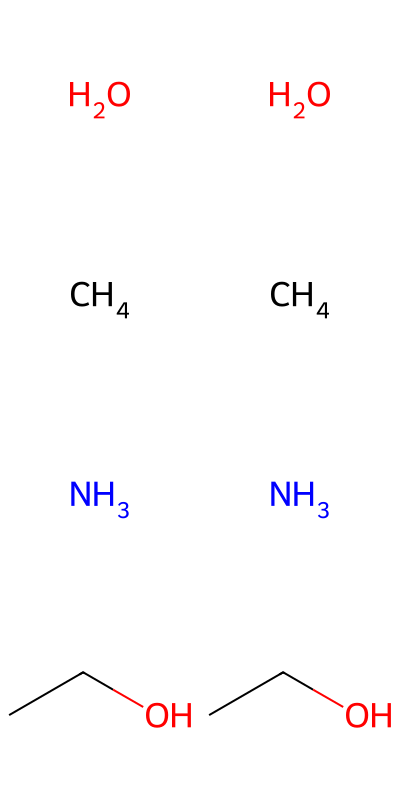

In [42]:
smiles_list_in = ["O", "C", "N", "CCO"]
smiles_list_out = list()
for s in smiles_list_in:
    smiles_in = to_canonical_smiles(s)
    g = smiles_to_pyg(smiles_in)
    smiles_out = pyg_to_smiles(g)
    smiles_list_out = smiles_list_out + [smiles_in, smiles_out]
    
    
print(smiles_list_out)
draw_molecules(smiles_list_out)


molecule_nx graph is [(0, {'atom_type': 'C'}), (1, {'atom_type': 'C'}), (2, {'atom_type': 'C'}), (3, {'atom_type': 'C'}), (4, {'atom_type': 'O'})] [(0, 1, {'bond_type': 1}), (1, 2, {'bond_type': 1}), (1, 3, {'bond_type': 1}), (2, 3, {'bond_type': 1}), (3, 4, {'bond_type': 1})]
[(0, 1, {'bond_type': 1}), (1, 2, {'bond_type': 1}), (1, 3, {'bond_type': 1}), (2, 3, {'bond_type': 1}), (3, 4, {'bond_type': 1})]
molecule_nx graph is [(0, {'atom_type': 'C'}), (1, {'atom_type': 'C'}), (2, {'atom_type': 'C'}), (3, {'atom_type': 'N'}), (4, {'atom_type': 'C'})] [(0, 1, {'bond_type': 1}), (1, 2, {'bond_type': 1}), (1, 3, {'bond_type': 1}), (2, 3, {'bond_type': 1}), (3, 4, {'bond_type': 1})]
[(0, 1, {'bond_type': 1}), (1, 2, {'bond_type': 1}), (1, 3, {'bond_type': 1}), (2, 3, {'bond_type': 1}), (3, 4, {'bond_type': 1})]
molecule_nx graph is [(0, {'atom_type': 'C'}), (1, {'atom_type': 'C'}), (2, {'atom_type': 'O'}), (3, {'atom_type': 'C'}), (4, {'atom_type': 'C'})] [(0, 1, {'bond_type': 1}), (1, 2, {

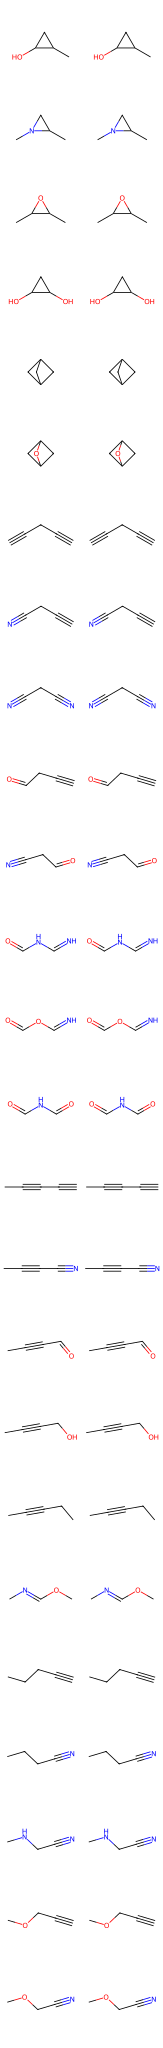

In [53]:
import pandas as pd
df = pd.read_csv("qm9.csv")

smiles_list_in = df.smiles[100:150].tolist()
smiles_list_out = list()
for s in smiles_list_in:
    smiles_in = to_canonical_smiles(s)
    g = smiles_to_pyg(smiles_in)
    smiles_out = pyg_to_smiles(g)
    smiles_list_out = smiles_list_out + [smiles_in, smiles_out]
    
    
print(smiles_list_out)
draw_molecules(smiles_list_out)

In [48]:
smiles_list

['C',
 'N',
 'O',
 'C#C',
 'C#N',
 'C=O',
 'CC',
 'CO',
 'CC#C',
 'CC#N',
 'CC=O',
 'C(=O)N',
 'CCC',
 'CCO',
 'COC',
 'C1CC1',
 'C1CO1',
 'CC(=O)C',
 'CC(=O)N',
 'C(=O)(N)N',
 'CC(C)C',
 'CC(C)O',
 'C#CC#C',
 'C#CC#N',
 'C(#N)C#N',
 'C#CC=O',
 'C(=O)C#N',
 'C(=O)C=O',
 'CC#CC',
 'CCC#C',
 'CCC#N',
 'C(C#N)N',
 'C#CCO',
 'C(C#N)O',
 'CCC=O',
 'CNC=O',
 'COC=O',
 'C(C=O)O',
 'CCCC',
 'CCCO',
 'CCOC',
 'C(CO)O',
 'CC1CC1',
 'CC1CO1',
 'CN1CC1',
 'C1CC1O',
 'C1CCC1',
 'C1COC1',
 'CC(=NO)C',
 'c1cc[nH]c1',
 'c1cnc[nH]1',
 'c1ccoc1',
 'c1cocn1',
 'CC(C)(C)C',
 'CC(C)(C)O',
 'CC(=O)C#C',
 'CC(=O)C#N',
 'C(#N)C(=N)N',
 'C#CC(=O)N',
 'CC(=O)C=O',
 'C(=O)C(=N)N',
 'C(=O)C(=O)N',
 'CC(C)C#C',
 'CC(C)C#N',
 'CC(N)C#N',
 'CC(O)C#C',
 'CC(O)C#N',
 'CC(C)C=O',
 'CC(O)C=O',
 'CN(C)C=O',
 'CC(=O)CO',
 'CCC(=O)C',
 'CCC(=O)N',
 'CC(=O)NC',
 'CNC(=O)N',
 'COC(C)=N',
 'CC(=O)OC',
 'COC(=O)N',
 'C(C(=O)N)O',
 '[NH3+]CC([O-])=O',
 'CC(C)CO',
 'CC(O)CO',
 'CCC(C)C',
 'CCC(C)O',
 'CC(C)OC',
 'CC1(CC1)C',
 'C